### 3. Simulating the full CMB signal

In this notebook we simulate the complete sky signal (which is $\sim 99^circ$ radiation). We make full use of `pysm3`, a package designed for this purpose which contains sophisticated models for:
 - Synchrotron radiation
 - Dust thermal radiation
 - CMB radiation
 - Anomalous emission (from rotating dust particles)
 - Free-free non polarized radiation 

We can input the $\ell$ resolution of the output map, and the WMAP instrument specifictions: frequency range and angular resolution, and simulate the sky map as seen with this parameters


In [3]:
import pysm3
import healpy as hp
from astropy import units as u
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
# angular resolution
nside = 512

# WMAP 
freq_23 = 22.82 * u.GHz  
fwhm_23 = 0.88 * u.deg

# run the simulation (around 5min in my machine)
sky = pysm3.Sky(nside=nside, preset_strings=["s1",'d1','a1','f1','c1'])
map_IQU_23 = sky.get_emission(freq=freq_23)

# Apply a smoothing so it matches the instrument resolution
map_IQU_23_fwhm = pysm3.apply_smoothing_and_coord_transform(map_IQU_23, fwhm=fwhm_23)

# save as fits file
hp.write_map('../results/maps/total_23GHz_0512_fwhm_5280.fits', map_IQU_23_fwhm, overwrite=True)

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


Plot it

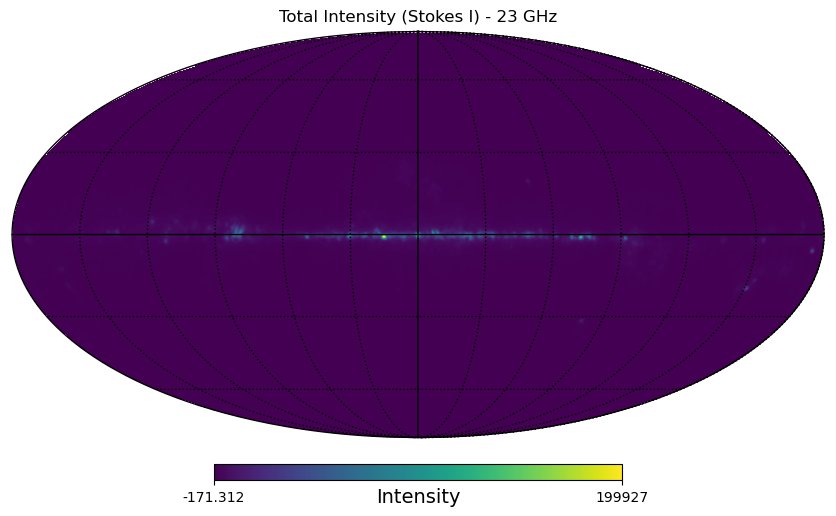

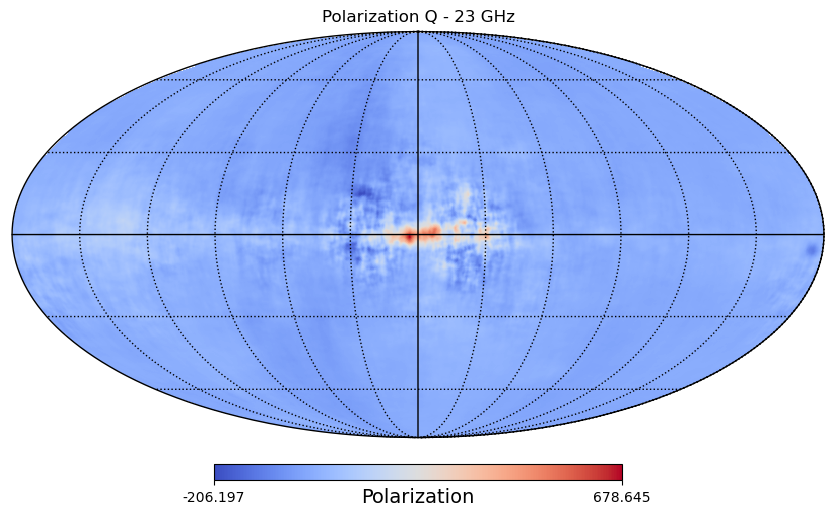

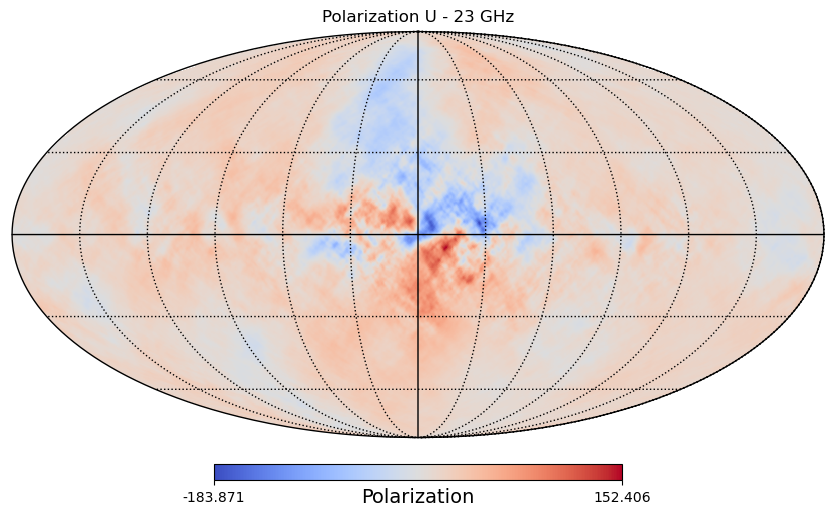

In [8]:
# Load the smoothed map (assuming it has 3 Stokes parameters: I, Q, U)
map_IQU = hp.read_map('../results/maps/total_23GHz_0512_fwhm_5280.fits', field=None)  # Load all fields

# Plot Stokes I
hp.mollview(map_IQU[0], title="Total Intensity (Stokes I) - 23 GHz", cmap="viridis", unit="Intensity")
hp.graticule() 
plt.show()

# Plot Stokes Q
hp.mollview(map_IQU[1], title="Polarization Q - 23 GHz", cmap="coolwarm", unit="Polarization")
hp.graticule()
plt.show()

# Plot Stokes U
hp.mollview(map_IQU[2], title="Polarization U - 23 GHz", cmap="coolwarm", unit="Polarization")
hp.graticule()
plt.show()